![Astrofisica Computacional](../../logo.png)

---
##  `FITS` Files (Images) I


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Abstract

In this notebook we will use `FITSIO` to read a .fits file and display its contents as an astronomical image.

---

The [Flexible Image Transport System](https://fits.gsfc.nasa.gov/fits_documentation.html) (FITS) format is widely used within the astronomical community to store images, spectra, tables, etc.

The FITS format was invented in the astronomy environment and is still used due to its simple, efficient and logical structure and because the data is **NOT compressed**. This means that the data is stored at the original resolution and no specialized software is required to uncompress and access it.

---

In this notebook, we will use a .fits image of the Horse Head Nebula, obtained from

http://data.astropy.org/tutorials/FITS-images/HorseHead.fits


Detailed information on handling .fits files with `astropy` can be found at

http://docs.astropy.org/en/stable/io/fits/index.html

---

## 1. Open and read a .fits file

The first step in accessing the file is to open it using the [FITSIO.FITS()](https://juliaastro.github.io/FITSIO.jl/stable/) function. This function returns an object called **HDUList** (**H**eader **D**ata **U**nits **List**). Here we will call this object `hdul`.

In [1]:
using FITSIO

hdul = FITS("HorseHead.fits")
hdul

File: HorseHead.fits
Mode: "r" (read-only)
HDUs: Num  Name     Type        
      1             Image       
      2    er.mask  ASCIITable  

The information of each HDU is easily accesed,

In [3]:
hdul[1]

File: HorseHead.fits
HDU: 1
Mode: read-only
Type: Image
Datatype: Int16
Datasize: (891, 893)

In [4]:
hdul[2]

File: HorseHead.fits
HDU: 2 (name=er.mask)
Type: ASCIITable
Rows: 1600
Columns: Name      Type     TFORM  
         XI        Float32  F6.2   
         ETA       Float32  F6.2   
         XI_CORR   Float32  F6.2   
         ETA_CORR  Float32  F6.2   

In general, there can be several information units, denoted by the names `hdul[0]`, `hdul[1]`, etc. The `hdul[0]` drive is called the PRIMARY drive and usually contains the initial access information for the file (eg number of cards, dimensions, format, etc.). In the other units there is additional relevant information, such as masks, filters, etc.

The type of each HDU is

In [5]:
for hdu in hdul; println(typeof(hdu)); end

ImageHDU{Int16, 2}
ASCIITableHDU


### 1.1. Headers and Data (Headers and Data)

Each HDU object contains a `header` and a `data` information. Using the `read_header` function it is possible to access the header of each of the HDU objecst, which contains all the information of that data unit. For example,

In [6]:
header = read_header(hdul[1])

SIMPLE  =                    T / FITS: Compliance
BITPIX  =                   16 / FITS: I*2 Data
NAXIS   =                    2 / FITS: 2-D Image Data
NAXIS1  =                  891 / FITS: X Dimension
NAXIS2  =                  893 / FITS: Y Dimension
EXTEND  =                    T / FITS: File can contain extensions
DATE    = '2014-01-09'         / FITS: Creation Date
ORIGIN  = 'STScI/MAST'         / GSSS: STScI Digitized Sky Survey
SURVEY  = 'SERC-ER '           / GSSS: Sky Survey
REGION  = 'ER768   '           / GSSS: Region Name
PLATEID = 'A0JP    '           / GSSS: Plate ID
SCANNUM = '01      '           / GSSS: Scan Number
DSCNDNUM= '00      '           / GSSS: Descendant Number
TELESCID=                    4 / GSSS: Telescope ID
BANDPASS=                   36 / GSSS: Bandpass Code
COPYRGHT= 'AAO/ROE '           / GSSS: Copyright Holder
SITELAT =              -31.277 / Observatory: Latitude
SITELONG=              210.934 / Observatory: Longitude
TELESCOP= 'UK Schmidt - Doubl' 

Here you will find a lot of information, such as: ORIGIN, DATE, RA, DEC, TELESCOPE, FILTER, etc. To access each of them you can use

In [8]:
header["FILTER"]

"OG590"

NOTE: To fully understand the information stored, you must refer to the source of the file (database, web page, documentation, etc.)

The total number of records in the header is

In [9]:
length(header)

161

The existence of a particular tag can be probed,

In [10]:
haskey(header, "DATE")

true

The comment of a particular record is obtained by

In [11]:
get_comment(header, "DATE")

"FITS: Creation Date"

---

On the other hand, the `data` contains the astrophysical information stored in the HDU. For example, in the specific case we are working on, the dimensionality and size of this information is

In [12]:
ndims(hdul[1])

2

In [13]:
size(hdul[1])

(891, 893)

We will assign this information to the 'image_data' variable,

In [14]:
image_data = read(hdul[1])

891×893 Matrix{Int16}:
  7201   6642   6922   7338   7058  …   5551   5412   5412   5796   5796
  6642   6363   6642   6918   6918      5551   5412   5132   5517   5796
  6642   6642   6922   7198   6639      5831   5691   5412   5796   6076
  7219   7358   7638   7477   6918      6076   5377   5097   5586   5866
  7498   7358   7079   7477   7477      6355   5656   5377   5586   5866
  6939   7219   6939   7058   7338  …   6076   5656   5656   5586   5866
  7219   7219   6939   7058   7338      5796   5377   5377   5586   5866
  7358   7498   6660   6290   6569      5866   5586   5307   5656   6215
  7358   7778   6939   6290   6569      6425   5866   5586   5936   6495
  7358   8057   7498   6709   6709      6844   6285   5726   5936   6215
  7358   8057   7498   6988   6988  …   6285   6006   5447   5377   5656
  7044   7463   6904   6604   6883      5796   5656   5377   5726   5726
  6764   6904   6904   6883   7163      5517   5656   5377   5726   6285
     ⋮                      

The information has been saved as an array,

In [16]:
typeof(image_data)

Matrix{Int16} (alias for Array{Int16, 2})

In this way we can easily access (part of) the data,

In [17]:
image_data[10:15 , 20:30]

6×11 Matrix{Int16}:
 7076  7076  7215  7215  7565  7285  6587  6587  6517  6237  6377
 6517  7076  6936  6936  7285  7006  6587  6587  6517  6237  6097
 6936  6936  6796  7076  6726  7006  7146  6587  6517  6796  6796
 7215  6656  6796  7076  6726  7006  7146  7146  6796  6517  6517
 7076  6796  7215  7495  7285  7285  7006  6726  6796  5958  6237
 7076  7355  7774  8054  7844  7844  7285  6447  6517  6237  6517

We can also obtain important statistical information,

In [24]:
using Statistics

minimum(image_data)

3759

In [25]:
maximum(image_data)

22918

In [26]:
mean(image_data)

9831.481676287574

In [27]:
std(image_data) # Standard deviation

3032.3946597827767

## 2. Image Display

For the file we are considering, the information stored corresponds to a photometric image of the nebula. In this way, we can use a function like [heatmap()](https://docs.juliaplots.org/stable/) to display the image


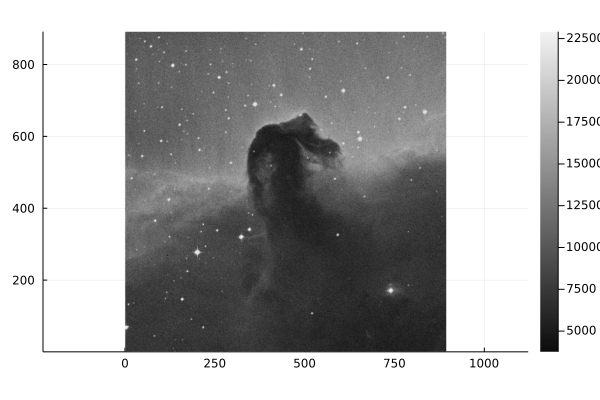

In [34]:
using Plots

heatmap(image_data, ratio=:equal, c=:grays)

The 'grays' color scheme can be changed. [There are multiple options](https://docs.juliaplots.org/stable/generated/colorschemes/)

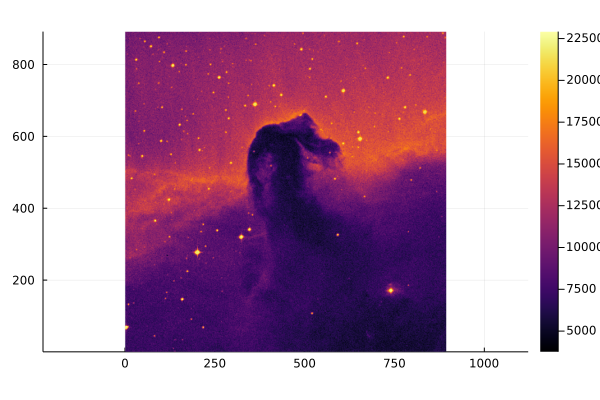

In [36]:
heatmap(image_data, ratio=:equal)

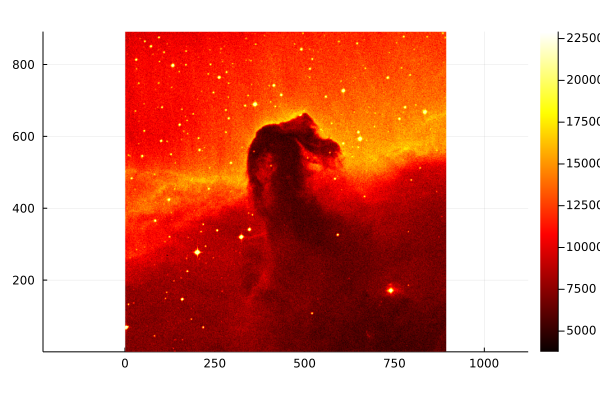

In [37]:
heatmap(image_data, ratio=:equal, c=:hot)

Additionally, a logarithmic color scale can be used to highlight details using the [matplotlib.colors.LogNorm](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.colors.LogNorm.html) function.

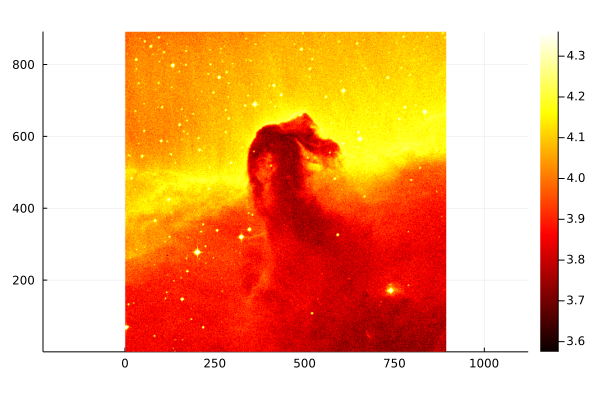

In [44]:
heatmap(log10.(image_data), ratio=:equal, c=:hot)